# Fetch MNIST Dataset
Loads the MNIST dataset of handwritten digits and displays the keys available in the dataset.

In [31]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

**Separate Features and Labels:** 
Splits the MNIST data into images (X) and their labels (y), then examines the pixel values in the middle area of the images.

In [32]:
# Separate the features (images) and labels
X, y = mnist['data'], mnist['target']

# View pixel intensities in the middle section of the first image
X.iloc[:, 400:500]

,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,...,pixel491,pixel492,pixel493,pixel494,pixel495,pixel496,pixel497,pixel498,pixel499,pixel500
0,0,0,0,0,0,81,240,253,253,119,...,0,0,0,249,253,249,64,0,0,0
1,253,190,0,0,0,0,0,0,0,0,...,0,0,0,7,131,252,225,71,0,0
2,0,47,49,116,144,150,241,243,234,179,...,0,0,0,169,254,137,0,0,0,0
3,0,0,0,0,80,240,251,193,23,0,...,172,0,0,0,0,0,0,0,0,0
4,252,30,22,119,197,241,253,252,251,77,...,255,253,109,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,128,255,255,255,...,255,255,64,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,60,207,254,...,0,0,7,254,254,254,254,75,0,0
69997,123,254,254,254,254,254,254,254,254,254,...,254,254,196,11,0,0,0,0,0,0
69998,0,5,213,254,254,254,254,249,91,0,...,156,254,254,126,0,0,0,0,0,0


**Examine First Data Point:** 
Shows the pixel data for the first image in the dataset along with its corresponding digit label.

In [33]:
# Display the first image and its label
X.iloc[0], y[0]

(pixel1      0
 pixel2      0
 pixel3      0
 pixel4      0
 pixel5      0
            ..
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 pixel784    0
 Name: 0, Length: 784, dtype: int64,
 '5')

**Visualize MNIST Images:** 
Plots the first 10 images from the dataset in a `2x5` grid, showing each digit in grayscale.

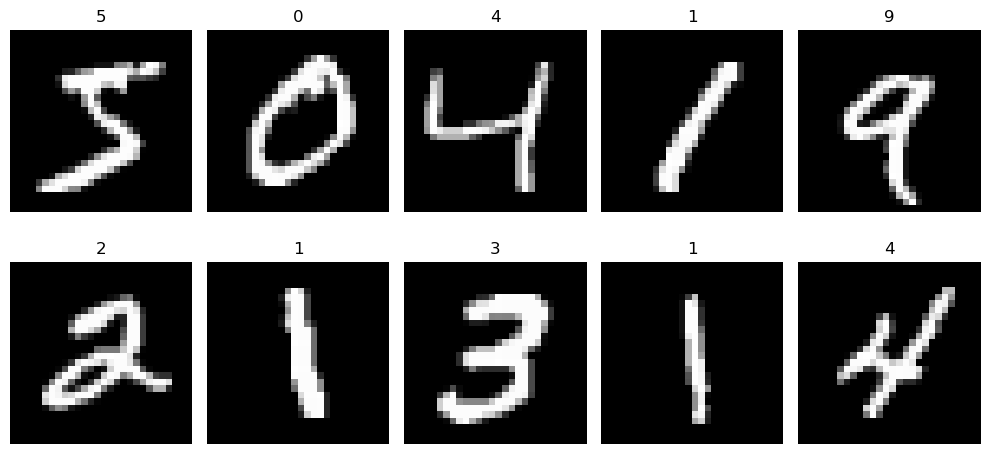

In [34]:
import matplotlib.pyplot as plt

fix, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap="gray")
    ax.set_title(y.iloc[i])
    ax.axis("off")

plt.tight_layout()
plt.show()

**Plot Sigmoid Function:** 
Graphs the sigmoid function to illustrate its S-shaped curve, highlighting the decision boundary at `y=0.5`.

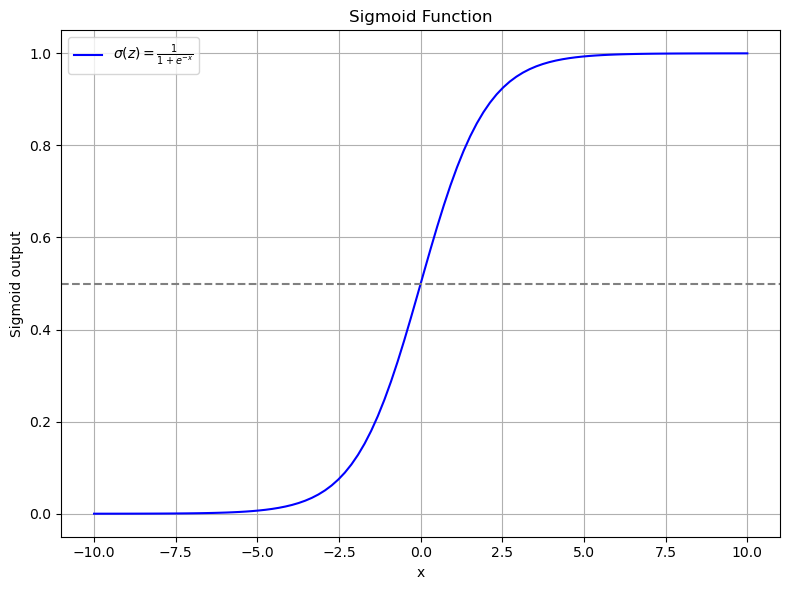

In [35]:
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


y = np.linspace(-10, 10, 100)

x = sigmoid(y)

# plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(y, x, label=r"$\sigma(z) = \frac{1}{1 + e^{-x}}$", color='blue')
plt.axhline(y=0.5, linestyle="--", color="grey")

plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("Sigmoid output")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Logistic Regression Components:** 

1. **Input Matrix $\mathbf{x}$**: 
   Represents 100 samples each with 3 features for logistic regression input.

2. **Weights Vector $\mathbf{w}$**: 
   Contains the weights for each of the 3 features.

3. **Bias $b$**: 
   A scalar bias term used in the linear combination.

4. **Linear Combination $z$**: 
   Calculated from the dot product of input features and weights plus bias.

5. **Predicted Probabilities $\hat{y}$**: 
   Sigmoid function applied to $z$ to get probabilities for classification.

1. **Input Matrix $ \mathbf{x} $**:
   The input data matrix with shape $ (100, 3) $:
   $$
   \mathbf{x} = \begin{bmatrix}
   x_{11} & x_{12} & x_{13} \\
   x_{21} & x_{22} & x_{23} \\
   \vdots & \vdots & \vdots \\
   x_{101} & x_{102} & x_{103}
   \end{bmatrix} \quad \text{(100 samples, 3 features)}
   $$

2. **Weights Vector $ \mathbf{w} $**:
   The weights vector with shape $ (3,) $:
   $$
   \mathbf{w} = \begin{bmatrix}
   w_1 \\
   w_2 \\
   w_3
   \end{bmatrix} \quad \text{(3 weights)}
   $$

3. **Bias $ b $**:
   The bias term (a scalar):
   $$
   b \quad \text{(1)}
   $$

4. **Linear Combination $ z $**:
   The result of the linear combination with shape $ (100, 1) $:
   $$
   z = \mathbf{x} \cdot \mathbf{w} + b = \begin{bmatrix}
   z_1 \\
   z_2 \\
   \vdots \\
   z_{100}
   \end{bmatrix} \quad \text{(100 linear combinations)}
   $$

5. **Predicted Probabilities $ \hat{y} $**:
   The predicted probabilities after applying the sigmoid function, also with shape $ (100, 1) $:
   $$
   \hat{y} = \sigma(z) = \begin{bmatrix}
   \hat{y}_1 \\
   \hat{y}_2 \\
   \vdots \\
   \hat{y}_{100}
   \end{bmatrix} \quad \text{(100 predicted probabilities)}
   $$

**Simulate Logistic Regression:** 
This code simulates logistic regression by generating random data, computing linear combinations, applying the sigmoid function, and plotting both the theoretical sigmoid curve and sample predictions.

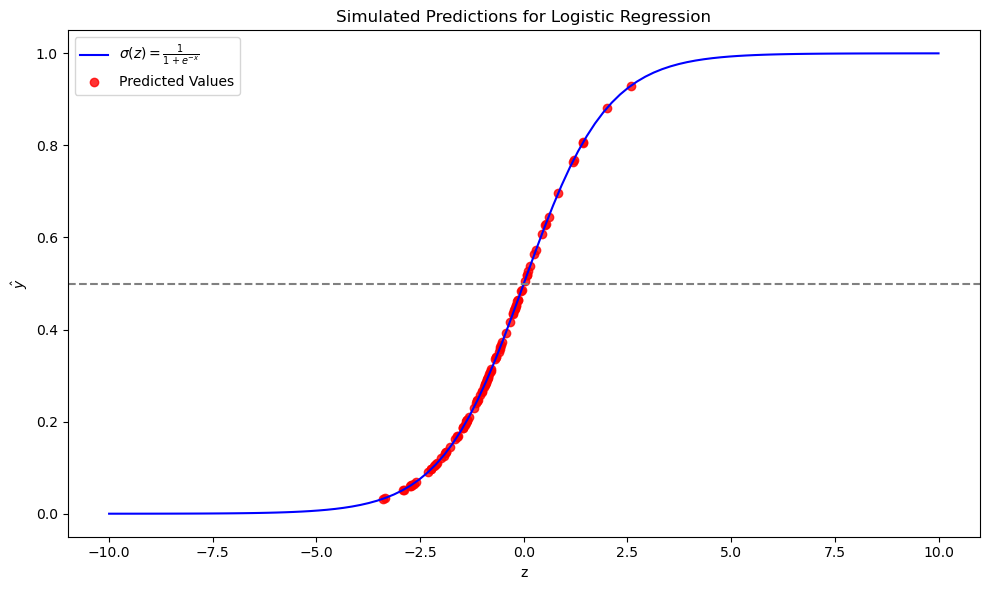

In [36]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


num_samples, num_features = 100, 3

weights = np.random.randn(num_features)
bias = np.random.randn()
y = np.random.randn(num_samples, num_features)

z = y @ weights + bias
y_hat = sigmoid(z)

# Sigmoid data
y = np.linspace(-10, 10, 100)
x = sigmoid(y)

plt.figure(figsize=(10, 6))
plt.plot(y, x, label=r"$\sigma(z) = \frac{1}{1 + e^{-x}}$", color='blue')
plt.scatter(z, y_hat, color="red", label="Predicted Values", alpha=0.8)
plt.axhline(y=0.5, linestyle="--", color="grey")

plt.title("Simulated Predictions for Logistic Regression")
plt.xlabel("z")
plt.ylabel(r"$\hat{y}$")

plt.legend()
plt.tight_layout()

plt.show()


**Broadcast and Matrix Operations:**
- Defines two numpy arrays `A` (3,1) and `B` (1,4).
- Demonstrates broadcasting in addition, resulting in a (3,4) matrix.
- Shows matrix multiplication, resulting in a (3,4) matrix.

In [37]:
import numpy as np

# Define array A with shape (3, 1)
A = np.array([
    [1],
    [2],
    [3],
])
print(f"Array A shape: {A.shape}")

# Define array B with shape (1, 4)
B = np.array([
    [1, 2, 3, 4],
])
print(f"Array B shape: {B.shape}")

# Perform broadcasting addition
result = A + B

print("A + B result: ")
print(result)

print(f"Result of A + B shape: {result.shape}")

# Broadcasting the same for the sum and matmul
matmul = A @ B
print(f"Matmul A @ B shape: {matmul.shape}")

print("Matmul result: ")
print(matmul)

Array A shape: (3, 1)
Array B shape: (1, 4)
A + B result: 
[[2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]]
Result of A + B shape: (3, 4)
Matmul A @ B shape: (3, 4)
Matmul result: 
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]]


**Data Preparation for Logistic Regression:**
- Splits the MNIST dataset into features (`X`) and labels (`y`).
- Converts labels to integers.
- Uses `train_test_split` to divide data into training and testing sets.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = mnist['data'], mnist['target']

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Logistic Regression Training and Evaluation:**
- Initializes and trains a logistic regression model.
- Predicts on the test set and calculates the accuracy score.

In [39]:
# Training
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(f"Score: {score}")

Score: 0.9150714285714285


d:\anaconda3\envs\au2grad\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **2x2 Confusion Matrix**

- **Predicted Positive**: Model says 'yes'.
- **Predicted Negative**: Model says 'no'.
- **Actual Positive**: True condition is 'yes'.
- **Actual Negative**: True condition is 'no'.

#### **Example:**
A medical test for disease detection with 100 people:
- **True Positive (TP)**: 50 people correctly diagnosed.
- **False Negative (FN)**: 10 people missed.
- **False Positive (FP)**: 5 healthy misdiagnosed.
- **True Negative (TN)**: 35 correctly identified as healthy.


### What Does a 2x2 Confusion Matrix Look Like?

|                    | **Predicted Positive** | **Predicted Negative** |
|--------------------|------------------------|------------------------|
| **Actual Positive** | True Positive (TP)     | False Negative (FN)    |
| **Actual Negative** | False Positive (FP)    | True Negative (TN)     |


### Example:
Consider a medical test for detecting a disease: out of 100 people, 60 actually have the disease, and 40 do not.

The confusion matrix would look like this:

|                    | **Predicted Positive** | **Predicted Negative** |
|--------------------|------------------------|------------------------|
| **Actual Positive** | 50 (TP)                | 10 (FN)                |
| **Actual Negative** | 5 (FP)                 | 35 (TN)                |

[    2     9    35 ... 13981 13985 13995]


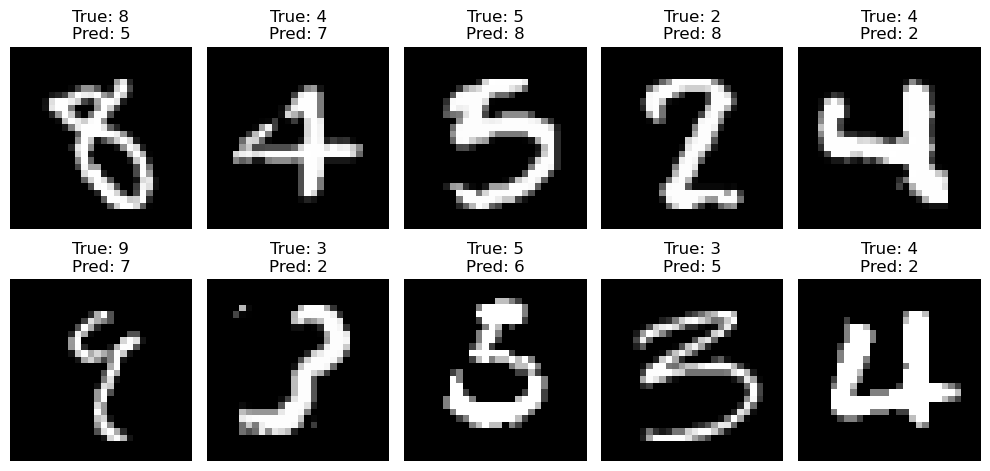

In [40]:
missclassified_idxs, = np.where(y_test != y_pred)
print(missclassified_idxs)

fix, axes = plt.subplots(2, 5, figsize=(10, 5))

for y, ax in enumerate(axes.flat):
    idx = missclassified_idxs[y]
    ax.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap="gray")
    ax.set_title(f"True: {y_test.iloc[idx]}\nPred: {y_pred[idx]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

**Plot Confusion Matrix:**
- Creates a visual representation of the confusion matrix.
- Each cell shows the count of predictions vs actual labels.
- Uses color to differentiate between high and low counts.

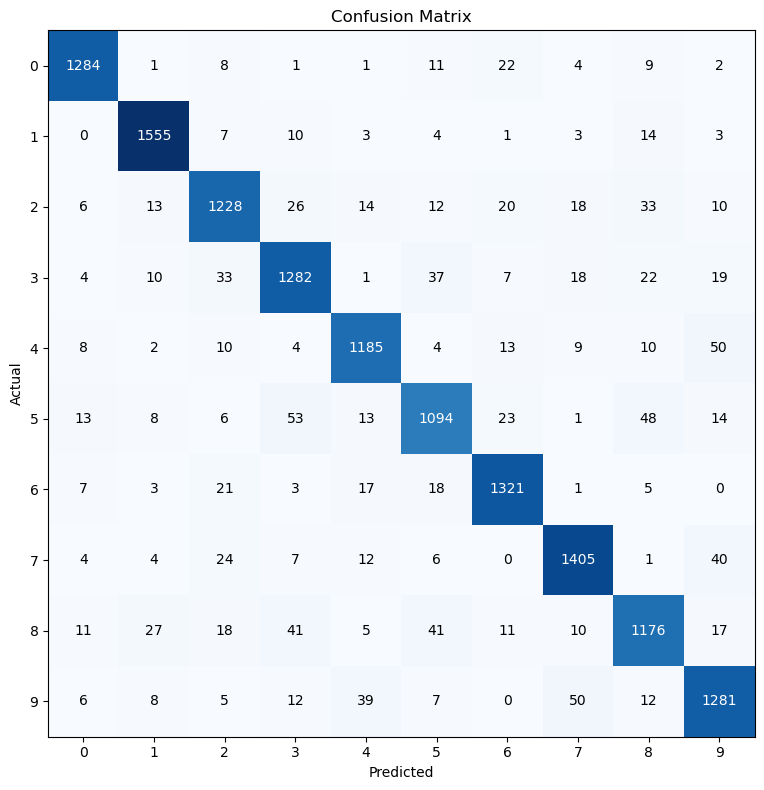

In [41]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_preds):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_preds)

    # Plot the confusion matrix using matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')

    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Add tick marks (integer labels) on x and y axis
    tick_marks = range(len(set(y_true)))  # Assuming labels are integers
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)

    # Annotate each cell with the numeric value of the confusion matrix
    for y in range(cm.shape[0]):
        for x in range(cm.shape[1]):
            plt.text(x, y, format(cm[y, x], 'd'),
                     ha="center", va="center",
                     color="white" if cm[y, x] > cm.max() / 2 else "black")

    # Display the plot
    plt.tight_layout()
    plt.show()


plot_confusion_matrix(y_test, y_pred)

## **Calculate Accuracy from Confusion Matrix**

Computes accuracy by summing the diagonal elements (correct predictions) and dividing by the total number of instances.

### $\text{Accuracy} = \frac{\sum \text{Diagonal elements}}{\text{Total number of instances}}$

**Accuracy:** The ratio of correct predictions to total predictions.

In [42]:
cm = confusion_matrix(y_test, y_pred)
accuracy = cm.trace() / cm.sum()

accuracy

np.float64(0.9150714285714285)

## Precision Calculation

**Precision** measures the accuracy of positive predictions.

### $\text{Precision}_i = \frac{\text{TP}_i}{\text{TP}_i + \text{FP}_i}$

**Precision Example:** If the model predicts 100 images as "3" and 90 are actually "3", then precision for "3" is 90%.


In [43]:
from sklearn.metrics import precision_score

# Calculate precision for each class
precision_per_class = precision_score(y_test, y_pred, average=None)

for idx, score in enumerate(precision_per_class):
    print(f'Precision for class {idx}: {score:.4f}')

Precision for class 0: 0.9561
Precision for class 1: 0.9534
Precision for class 2: 0.9029
Precision for class 3: 0.8909
Precision for class 4: 0.9186
Precision for class 5: 0.8865
Precision for class 6: 0.9316
Precision for class 7: 0.9250
Precision for class 8: 0.8842
Precision for class 9: 0.8921


**Manual Precision Calculation:** Computes precision for each class from the confusion matrix, handling division by zero.

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

precision_per_class = []

for i in range(len(cm)):
    TP = cm[i, i] # True positive for class i
    FP_TP = cm[:, i].sum()
    precision = TP / FP_TP if FP_TP > 0 else 0 # Avoid division by 0
    precision_per_class.append(precision)

for idx, prec in enumerate(precision_per_class):
    print(f'Precision for class {idx}: {prec:.4f}')

Precision for class 0: 0.9561
Precision for class 1: 0.9534
Precision for class 2: 0.9029
Precision for class 3: 0.8909
Precision for class 4: 0.9186
Precision for class 5: 0.8865
Precision for class 6: 0.9316
Precision for class 7: 0.9250
Precision for class 8: 0.8842
Precision for class 9: 0.8921


### **Recall Calculation**

### $\text{Recall}_i = \frac{\text{TP}_i}{\text{TP}_i + \text{FN}_i}$

Recall measures the ability of the model to identify all the positive instances.

**Recall Example:** If the model correctly identifies 90 out of 120 actual "3"s, the recall for "3" is 75%.

In [45]:
from sklearn.metrics import recall_score

# Calculate recall for each class
recall_per_class = recall_score(y_test, y_pred, average=None)

for idx, score in enumerate(recall_per_class):
    print(f'Recall for class {idx}: {score:.4f}')

Recall for class 0: 0.9561
Recall for class 1: 0.9719
Recall for class 2: 0.8899
Recall for class 3: 0.8946
Recall for class 4: 0.9151
Recall for class 5: 0.8594
Recall for class 6: 0.9463
Recall for class 7: 0.9348
Recall for class 8: 0.8666
Recall for class 9: 0.9021


In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

recall_per_class = []

for i in range(len(cm)):
    TP = cm[i, i] # True positive for class i
    FN_TP = cm[i, :].sum()
    recall = TP / FN_TP if FN_TP > 0 else 0 # Avoid division by 0
    recall_per_class.append(recall)

for idx, score in enumerate(recall_per_class):
    print(f'Recall for class {idx}: {score:.4f}')

Recall for class 0: 0.9561
Recall for class 1: 0.9719
Recall for class 2: 0.8899
Recall for class 3: 0.8946
Recall for class 4: 0.9151
Recall for class 5: 0.8594
Recall for class 6: 0.9463
Recall for class 7: 0.9348
Recall for class 8: 0.8666
Recall for class 9: 0.9021


### **F1-Score Calculation**

F1-Score is the harmonic mean of precision and recall, balancing the two metrics.

### $\text{F1-Score}_i = 2 \times \frac{\text{Precision}_i \times \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}$

**Example**: If the model predicts 100 images as "3" and 90 are actually "3" (with 10 being other digits), the precision for class "3" is 90/100 = 0.90, or 90%.
If the model correctly identifies 90 out of 120 actual "3"s, the recall for class "3" is 90/120 = 0.75, or 75%.

$$f1 = 2 * (0.9 * 0.75) / (0.9 + 0.75) \approx 0.818$$

**F1-Score per Class:** Provides a measure that considers both precision and recall for each class.

In [47]:
from sklearn.metrics import f1_score

# Calculate f1 for each class
f1_per_class = f1_score(y_test, y_pred, average=None)

for idx, score in enumerate(f1_per_class):
    print(f'F1 for class {idx}: {score:.4f}')

F1 for class 0: 0.9561
F1 for class 1: 0.9626
F1 for class 2: 0.8964
F1 for class 3: 0.8928
F1 for class 4: 0.9168
F1 for class 5: 0.8728
F1 for class 6: 0.9389
F1 for class 7: 0.9298
F1 for class 8: 0.8753
F1 for class 9: 0.8971


**Manual F1-Score Calculation:**

Computes F1-Score from the confusion matrix, handling potential division by zero issues.

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

f1_per_class = []

for i in range(len(cm)):
    TP = cm[i, i] # True positive for class i
    FN_TP = cm[i, :].sum()
    FP_TP = cm[:, i].sum()

    precision = TP / FP_TP if FP_TP > 0 else 0 # Avoid division by 0
    recall = TP / FN_TP if FN_TP > 0 else 0 # Avoid division by 0

    f1 = 2 * ((precision * recall) / (precision + recall)) if (precision + recall) > 0 else 0

    f1_per_class.append(f1)

for idx, score in enumerate(f1_per_class):
    print(f'F1 for class {idx}: {score:.4f}')

F1 for class 0: 0.9561
F1 for class 1: 0.9626
F1 for class 2: 0.8964
F1 for class 3: 0.8928
F1 for class 4: 0.9168
F1 for class 5: 0.8728
F1 for class 6: 0.9389
F1 for class 7: 0.9298
F1 for class 8: 0.8753
F1 for class 9: 0.8971


**Model Evaluation and Metrics:** Trains a logistic regression model, predicts on test data, and evaluates with multiple metrics.

**Evaluation Metrics Table:** Shows accuracy along with precision, recall, and F1-Score for each class in a structured format.

In [49]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Training
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(f"Score: {score}")

# Calculate precision, recall, and F1 scores per class
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)

# Create a DataFrame to store the metrics per class
metrics_df = pd.DataFrame({
    'Class': range(len(precision_per_class)),
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F1-Score': f1_per_class
})

# Display the table
print(metrics_df)


Score: 0.9168571428571428
   Class  Precision    Recall  F1-Score
0      0   0.956845  0.957558  0.957201
1      1   0.955187  0.972500  0.963766
2      2   0.903226  0.892754  0.897959
3      3   0.896431  0.893929  0.895178
4      4   0.920746  0.915058  0.917893
5      5   0.887369  0.866457  0.876789
6      6   0.932299  0.946991  0.939588
7      7   0.929801  0.934132  0.931962
8      8   0.885393  0.871039  0.878158
9      9   0.891742  0.904930  0.898287


d:\anaconda3\envs\au2grad\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Data Scaling**

**Scaling:** Prepares the data for better model performance by normalizing or scaling features.

#### StandardScaler: Standardizes features by removing the mean and scaling to unit variance.

$$x_{\text{scaled}} = \frac{x - \text{mean}}{\text{standard deviation}}$$

#### MinMaxScaler: Scales features to a fixed range, typically [0, 1], by subtracting the minimum value and dividing by the range.

$$x_{\text{scaled}} = \frac{x - \text{min}}{\text{max} - \text{min}}$$


In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Dimensionality Reduction with PCA:**

Reduces the number of input features to 100 principal components, retaining most variability.

**PCA Transformation:** Applies PCA to reduce data dimensions while attempting to keep the most significant information.

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)

X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)


### **Polynomial Feature Expansion**

**Polynomial Feature Generation:** Expands the feature space by introducing non-linear combinations of the original features, potentially capturing more complex patterns in the data.

#### **Simple Example:** After PCA, the data might be reduced to two components. Polynomial features generate new features by squaring and interacting the original components.

Suppose the PCA step reduced our data to two components, `x1` and `x2`. Polynomial features with degree 2 would expand this to:

- $x_1$, $x_2$ (original components)
- $x_1^2$, $x_2^2$ (squared terms)
- $x_1 x_2$ (interaction term)

#### **For 3 Features:** Polynomial features of degree 2 create new features by including each original feature, their squares, and their interactions.

If we have **3 features** $ x_1 $, $ x_2 $, and $ x_3 $ with degree 2, we include:

- Each feature itself (linear terms)
- Squared terms for each feature
- Interaction terms between pairs of features

1. $ x_1 $
2. $ x_2 $
3. $ x_3 $
4. $ x_1^2 $  (squared term for $ x_1 $)
5. $ x_2^2 $  (squared term for $ x_2 $)
6. $ x_3^2 $  (squared term for $ x_3 $)
7. $ x_1 \cdot x_2 $ (interaction between $ x_1 $ and $ x_2 $)
8. $ x_1 \cdot x_3 $ (interaction between $ x_1 $ and $ x_3 $)
9. $ x_2 \cdot x_3 $ (interaction between $ x_2 $ and $ x_3 $)

In [52]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled_pca)
X_test_poly = poly.transform(X_test_scaled_pca)


**Visualizing Data Transformations:**

**Visualization Grid:** Compares the effects of scaling, PCA, and polynomial expansion on the images.

- Restores PCA transformed data to original space.
- Selects images of specific digits for visualization.
- Displays the original, scaled, PCA restored images, and histograms of polynomial features.


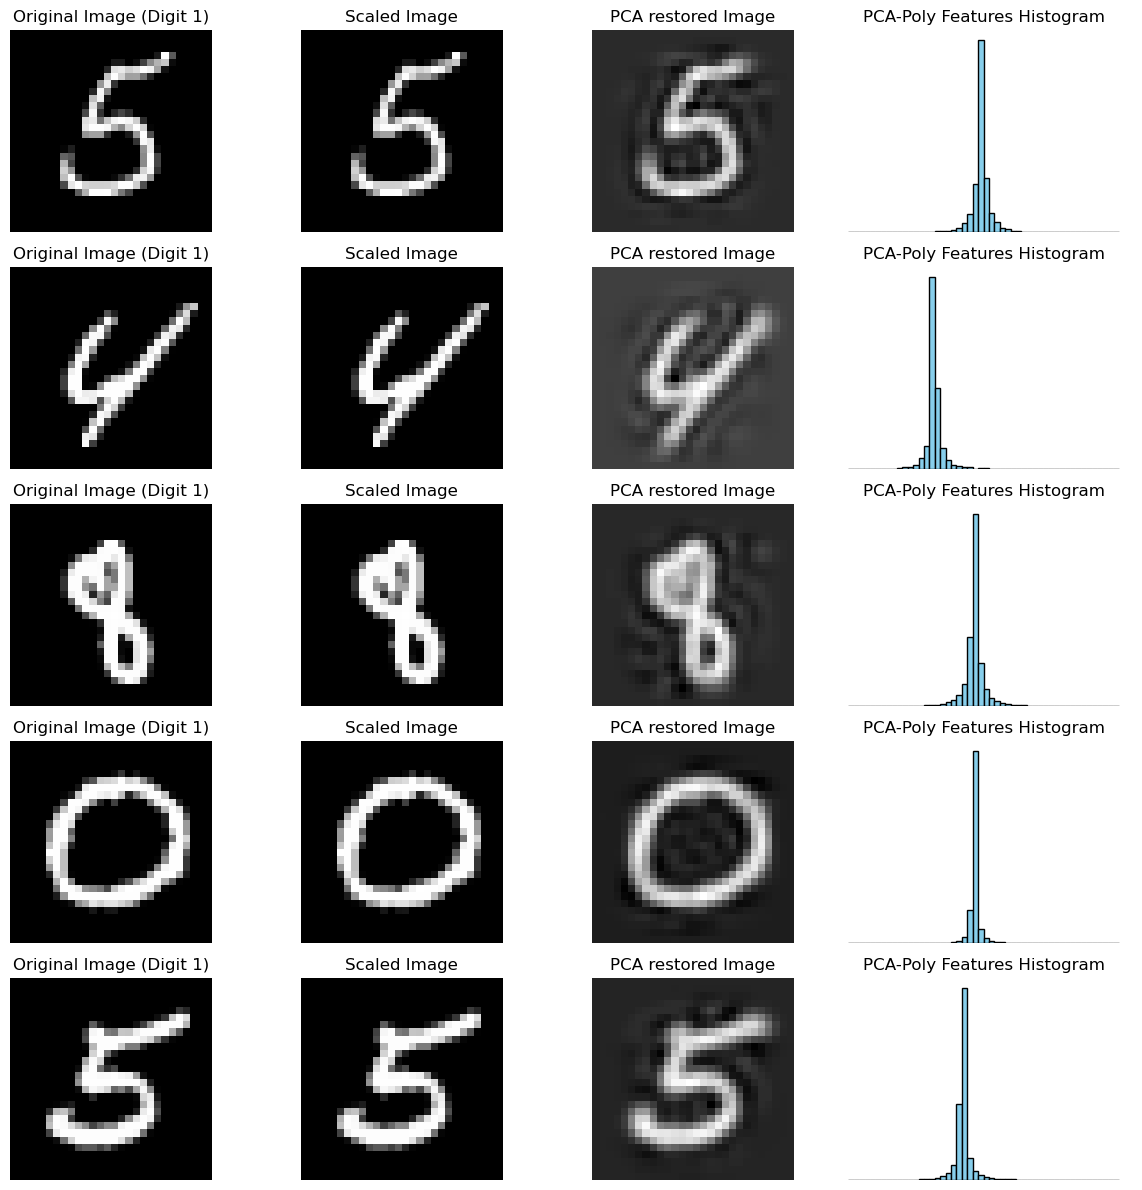

In [53]:
X_train_scaled_pca_restored = pca.inverse_transform(X_train_scaled_pca)

# Define the digit to visualize, e.g., only "5"s
chosen_digit = 1
chosen_digits = [0, 5, 1, 8, 9, 7, 4, 3]


# Find indices of the chosen digit in y_train
# digit_indices = np.where(y_train == chosen_digit)[0]
digit_indices = np.where(np.isin(y_train, list(chosen_digits)))[0]

X_train_selected = X_train.iloc[digit_indices]
X_train_scaled_selected = X_train_scaled[digit_indices]
X_train_scaled_pca_restored_selected = X_train_scaled_pca_restored[digit_indices]
X_train_poly_digit = X_train_poly[digit_indices]

# Set the number of images to visualize (use min to handle cases with fewer examples)
num_images = min(len(digit_indices), 5)  # For example, visualize up to 5 images

# Create a figure for visualization
fig, axes = plt.subplots(num_images, 4, figsize=(12, 12))

for i in range(num_images):
    original_image = X_train_selected.iloc[i].values.reshape(28, 28)
    scaled_image = X_train_scaled_selected[i].reshape(28, 28)
    pca_restored_image = X_train_scaled_pca_restored_selected[i].reshape(28, 28)
    
    # Plot original image
    axes[i, 0].imshow(original_image, cmap='gray')
    axes[i, 0].set_title(f"Original Image (Digit {chosen_digit})")
    axes[i, 0].axis('off')
    
    # Plot scaled image
    axes[i, 1].imshow(scaled_image, cmap='gray')
    axes[i, 1].set_title("Scaled Image")
    axes[i, 1].axis('off')

    # Plot PCA restored image
    axes[i, 2].imshow(pca_restored_image, cmap='gray')
    axes[i, 2].set_title("PCA restored Image")
    axes[i, 2].axis('off')

    # Plot histogram of polynomial features
    axes[i, 3].hist(X_train_poly_digit[i], bins=50, color='skyblue', edgecolor='black')
    axes[i, 3].set_title("PCA-Poly Features Histogram")
    axes[i, 3].axis('off')


plt.tight_layout()
plt.show()


**Model Training and Evaluation with Polynomial Features:**

**Evaluation with Polynomial Features:** Demonstrates how polynomial feature expansion affects classification performance.

- Trains logistic regression on polynomial expanded features.
- Predicts on the test set and calculates performance metrics for each class.


In [54]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Training
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_poly, y_train)

# Evaluation
y_pred = model.predict(X_test_poly)

score = accuracy_score(y_test, y_pred)
print(f"Score: {score}")

# Calculate precision, recall, and F1 scores per class
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)

# Create a DataFrame to store the metrics per class
metrics_df = pd.DataFrame({
    'Class': range(len(precision_per_class)),
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F1-Score': f1_per_class
})

# Display the table
print(metrics_df)

Score: 0.9805
   Class  Precision    Recall  F1-Score
0      0   0.987332  0.986597  0.986965
1      1   0.991261  0.992500  0.991880
2      2   0.974747  0.978986  0.976862
3      3   0.981026  0.974180  0.977591
4      4   0.977029  0.985328  0.981161
5      5   0.977183  0.975648  0.976415
6      6   0.990688  0.990688  0.990688
7      7   0.980106  0.983367  0.981734
8      8   0.976048  0.960943  0.968437
9      9   0.967832  0.974648  0.971228
